Best option Ann 2



In [1]:
# 1. Packages Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
upload = files.upload() #upload DNB_BANK_PX_Last.xlsx and all the files from Q1 Master Thesis NOR

Saving [nor]_[at_be]_[monthly]_[vw].xlsx to [nor]_[at_be]_[monthly]_[vw].xlsx
Saving [nor]_[ivol_capm_21d]_[monthly]_[vw].xlsx to [nor]_[ivol_capm_21d]_[monthly]_[vw].xlsx
Saving [nor]_[ope_be]_[monthly]_[vw].csv to [nor]_[ope_be]_[monthly]_[vw].csv
Saving [nor]_[ope_be]_[monthly]_[vw].xlsx to [nor]_[ope_be]_[monthly]_[vw].xlsx
Saving [nor]_[ret_12_1]_[monthly]_[vw].xlsx to [nor]_[ret_12_1]_[monthly]_[vw].xlsx
Saving [nor]_[sale_gr1]_[monthly]_[vw].xlsx to [nor]_[sale_gr1]_[monthly]_[vw].xlsx
Saving [nor]_[size]_[monthly]_[vw].xlsx to [nor]_[size]_[monthly]_[vw].xlsx
Saving [nor]_[turnover_126d]_[monthly]_[vw].xlsx to [nor]_[turnover_126d]_[monthly]_[vw].xlsx
Saving [nor]_[value]_[monthly]_[vw].xlsx to [nor]_[value]_[monthly]_[vw].xlsx
Saving DNB_BANK_PX_Last.xlsx to DNB_BANK_PX_Last.xlsx
Saving File_to_input_ANN_NOR.xlsx to File_to_input_ANN_NOR.xlsx
Saving market_returns.csv to market_returns.csv
Saving monthly_inputs_norway.xlsx to monthly_inputs_norway.xlsx
Saving NOR_Q1_additional

In [2]:
# 2.1 Fama-French Three Factors Model Data

# Norway, DNB_BANK, returns
nor_DNB_BANK_monthly = pd.read_excel("DNB_BANK_PX_Last.xlsx") # read data

nor_DNB_BANK_monthly_array = nor_DNB_BANK_monthly.to_numpy() # important in order to be able to process data
nor_DNB_BANK_monthly_returns = nor_DNB_BANK_monthly_array[:,2] 
DNB_BANK_returns = nor_DNB_BANK_monthly_returns[126:338] # start 5/2003, end 2020-12-31

#print(DNB_BANK_returns)
DNB_BANK_returns.shape


(212,)

In [3]:
# 2.2 Fama-French Three Factors Model Data

# Norway, Size, SMB
nor_size_monthly_vw = pd.read_excel('[nor]_[size]_[monthly]_[vw].xlsx') # read data
nor_size_monthly_vw_array = nor_size_monthly_vw.to_numpy() # important in order to be able to process data

nor_size_monthly_vw_returns = nor_size_monthly_vw_array[:,6] 
SMB_returns_nor = nor_size_monthly_vw_returns [207:419] # for t-1 start 4/2003, end 2020-11-31

print(nor_size_monthly_vw_array[207:419])
SMB_returns_nor.shape

[['nor' 'size' 'monthly' ... 4.0 Timestamp('2003-04-30 00:00:00')
  0.0858566133288241]
 ['nor' 'size' 'monthly' ... 4.0 Timestamp('2003-05-31 00:00:00')
  0.007115276055713]
 ['nor' 'size' 'monthly' ... 4.0 Timestamp('2003-06-30 00:00:00')
  -0.0200190303953915]
 ...
 ['nor' 'size' 'monthly' ... 5.0 Timestamp('2020-09-30 00:00:00')
  0.0045962213434849]
 ['nor' 'size' 'monthly' ... 5.0 Timestamp('2020-10-31 00:00:00')
  0.0281997225879762]
 ['nor' 'size' 'monthly' ... 5.0 Timestamp('2020-11-30 00:00:00')
  0.0779379743186213]]


(212,)

In [4]:
# 2.3 Fama-French Three Factors Model Data

# Norway, Value, HML
nor_value_monthly_vw = pd.read_excel('[nor]_[value]_[monthly]_[vw].xlsx') # read data
nor_value_monthly_vw_array = nor_value_monthly_vw.to_numpy() # important in order to be able to process data

nor_value_monthly_vw_returns = nor_value_monthly_vw_array[:,6] 
HML_returns_nor = nor_value_monthly_vw_returns[195:407] # for t-1 start 4/2003, end 2020-11-31

print(nor_value_monthly_vw_array[195:407])
HML_returns_nor.shape

[['nor' 'value' 'monthly' ... 18.0 Timestamp('2003-04-30 00:00:00')
  0.0199161686123454]
 ['nor' 'value' 'monthly' ... 18.0 Timestamp('2003-05-31 00:00:00')
  -0.0007032015308957]
 ['nor' 'value' 'monthly' ... 18.0 Timestamp('2003-06-30 00:00:00')
  0.0310390412744292]
 ...
 ['nor' 'value' 'monthly' ... 18.0 Timestamp('2020-09-30 00:00:00')
  -0.0461887538140748]
 ['nor' 'value' 'monthly' ... 18.0 Timestamp('2020-10-31 00:00:00')
  -0.0004621481610393]
 ['nor' 'value' 'monthly' ... 18.0 Timestamp('2020-11-30 00:00:00')
  0.062752866913841]]


(212,)

In [133]:
additional_monthly = pd.read_excel("NOR_Q1_additional.xlsx") # read data

additional_monthly_array = additional_monthly.to_numpy() # important in order to be able to process data
oil_monthly = additional_monthly_array[3:215,2]
usd_nor_monthly = additional_monthly_array[3:215,1]
div_payout_monthly = additional_monthly_array[0:212,3] # t-4 months 
div_payout_monthly.shape

(212,)

In [134]:
# 2.4 Fama-French Three Factors Model Data

# Norway, Historical risk-free rate
risk_free_nor = pd.read_excel('Risk Free Norway.xlsx') # read data
risk_free_nor_array = risk_free_nor.to_numpy() # important in order to be able to process data

#risk_free_nor_returns = risk_free_nor_array[:,6]/100 
#rf_nor = risk_free_nor_returns[3:327]
rf_nor_t1 = risk_free_nor_array[112:324,1]/100 # risk free t-1
rf_nor = risk_free_nor_array[113:325,1]/100

#print(risk_free_nor_array[112:324])
rf_nor.shape

(212,)

In [135]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#help(stats.linregress)

In [136]:
import pandas_datareader as web
# If problem: "ModuleNotFoundError: No module named 'pandas_datareader'"
# Then open cmd --> Anaconda prompt --> activate environment --> paste the code below
# conda install -c anaconda pandas-datareader

### EXCESS RETURNS

In [137]:
excess_returns_nor = DNB_BANK_returns - rf_nor
print(excess_returns_nor)

[0.084659509776 -0.026968095688 0.049408762599 -0.06725404266400001
 -0.039651725803 0.219580573177 -0.004738593504 0.07541813049200001
 -0.004293110778 0.052817808931 0.011852750238999999 -0.034894785901
 -0.022268704311 0.10875825691900001 0.013235710799 0.09217722418900001
 0.012711955669000002 0.012510852608999999 0.06787630707900001
 0.033059238289 0.016009324009 0.084268738699 0.022139195569
 -0.07492125726099999 0.040097364599 0.09042814687900001 -0.005485933589
 -0.012840225989 0.0019133568320000003 -0.016634890619 0.061872143159
 0.015605857606000001 0.081271030836 0.09861054610600001 0.0740243136
 -0.033473754323 -0.087106047853 -0.015360658454999999 0.007130707026
 0.045376189287 -0.025473839987 0.068504528423 -0.025293434187
 0.054094391766 0.100502875809 -0.117867714112 0.029919974266
 -0.007454172708000001 -0.051917604622 -0.068157985305
 0.015130010674000001 0.023604743605000002 0.0301529247 0.064969832496
 -0.023244124444 -0.050233607786 -0.112712816086 0.100834797014
 

### MARKET RETURNS

In [138]:
#upload market_returns.csv
#upload = files.upload()

In [139]:
# Output variables, y

mkt_ret = pd.read_csv('market_returns.csv') 

mkt_ret_array = mkt_ret.to_numpy()

# creating market returns for Norway
# Note: we need to start from 1990-05-31 for Norway since the data starts from there
mkt_ret_nor = mkt_ret_array[20445:20657] # 212 datapoints for t-1
print(mkt_ret_nor)


[['NOR' '2003-04-30' 168 ... 0.1882648963 0.140472848 0.1873258963]
 ['NOR' '2003-05-31' 161 ... 0.1454685198 0.1211859547 0.1445655198]
 ['NOR' '2003-06-30' 159 ... 0.0087003611 -0.01116036 0.0077163611]
 ...
 ['NOR' '2020-09-30' 253 ... -0.047267615 -0.074649569 -0.04633402]
 ['NOR' '2020-10-31' 255 ... -0.047197711 -0.06433862 -0.046003858]
 ['NOR' '2020-11-30' 268 ... 0.2901295107 0.2304916979 0.2874249084]]


In [140]:
mkt_ret_nor_df = pd.DataFrame(mkt_ret_nor)
#creating the excess market returns
y_nor = mkt_ret_nor[:,7] - rf_nor_t1 # mkt_vw

# I print this out to see it as panel data
y_df = pd.DataFrame(y_nor) # This represents output or column: # mkt_vw
y_df.columns = ['mkt_vw']
R_m_nor = np.asarray(y_nor).astype(np.float32)

print(R_m_nor)
print(len(R_m_nor))

[ 0.13559748  0.11691999 -0.0151569   0.06097797  0.00093292  0.00740873
  0.10659275  0.04908339  0.08230367  0.02096313  0.08417046  0.00641104
 -0.02575371  0.046816    0.03476728 -0.01652372  0.02798581  0.10475931
  0.02225838  0.13400164  0.0158287  -0.0174947   0.12000927 -0.03343656
 -0.02969856  0.03796762  0.09431501  0.07327898  0.08715363  0.01605372
 -0.07987839 -0.00303436  0.05771011  0.10497173  0.00129872  0.11073258
  0.10225442 -0.0459226  -0.03865825  0.02373817 -0.02948675 -0.06569869
  0.07546028  0.08567975  0.04704374  0.03250977 -0.0293969   0.05232782
  0.05948567  0.0263593   0.058568   -0.01255435 -0.04955176  0.12207671
  0.03848419 -0.06182671  0.00776672 -0.20278706  0.12256216 -0.01541363
  0.11009009  0.06972676 -0.06608737 -0.09228783 -0.05848926 -0.3066122
 -0.31476566 -0.13787699  0.00652923  0.03099617 -0.07689776  0.08283809
  0.1284774   0.20006628 -0.04978686  0.08824105  0.03108891  0.09545699
  0.04565318  0.04430802  0.03387084 -0.04081487 -0.

### REGRESSION

In [141]:
# df = pd.DataFrame(market_returns_nor,HML_returns_nor,SMB_returns_nor)
# print(df)
X1 = R_m_nor
X2 = HML_returns_nor
X3 = SMB_returns_nor
X4 = usd_nor_monthly 
X5 = oil_monthly 
X6 = div_payout_monthly

# regressors - that which regresses, or causes regression
X = R_m_nor
X_df = pd.DataFrame(X) # This represents output or column: # R_m_nor
X_df.columns = ['X1 (R_m_nor)']
X_df.insert(1, 'X2 (HML_returns_nor)', HML_returns_nor, True)
X_df.insert(1, 'X3 (SMB_returns_nor)', SMB_returns_nor, True)
X_df.insert(1, 'X4 (usd_nor_monthly)', usd_nor_monthly, True)
X_df.insert(1, 'X5 (oil_monthly)', oil_monthly, True)
X_df.insert(1, 'X6 (div_payout_monthly)', div_payout_monthly, True)
print(X_df)

# regressand - the dependent variable in a regression
Y = excess_returns_nor



     X1 (R_m_nor) X6 (div_payout_monthly) X5 (oil_monthly)  \
0        0.135597                 0.84737             25.0   
1        0.116920                0.913171            25.86   
2       -0.015157                0.918952            27.65   
3        0.060978                0.811785            28.35   
4        0.000933                0.650697            29.89   
..            ...                     ...              ...   
207      0.100066                  0.9597            43.24   
208      0.081773                0.851501            44.74   
209     -0.074574                0.735297            40.91   
210     -0.064288                0.668981            40.19   
211      0.230964                0.649796            42.69   

    X4 (usd_nor_monthly) X3 (SMB_returns_nor) X2 (HML_returns_nor)  
0                 6.9984             0.085857             0.019916  
1                  6.676             0.007115            -0.000703  
2                  7.208            -0.020019   

In [142]:
from sklearn import linear_model
import statsmodels.api as sm
# ACTIVATE YOUR CONDA ENVIRONEMENT AND TYPE THIS:
# conda install -c conda-forge statsmodels

In [143]:
X_df = X_df.to_numpy() #dataframe to num
X_df.shape

(212, 6)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size = 0.25, random_state = 0,shuffle=False)
# with shuffle = false i do not have random sampling

In [145]:
#mlr = LinearRegression()  
#mlr.fit(X_df, Y)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [146]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept:  0.10706092504505449
Coefficients: [ 0.19007894 -0.02809692 -0.00054618 -0.0073345   0.44676115  0.45403169]


In [147]:
# rf_nor
# DNB_BANK_returns
# HML_returns_nor
# SMB_returns_nor

In [148]:
np.mean(y_test)

0.017350277283622453

In [149]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

# compute with formulas from the theory
test_predictions_FF3 = mlr.predict(x_test)
SS_Residual = sum((y_test-test_predictions_FF3)**2)   
SS_Total = sum((y_test)**2)     

# r_squared
r_squared_FF3 = 1 - (SS_Residual)/SS_Total
print("R2 =", r_squared_FF3)

# adjusted_r_squared 
#adjusted_r_squared = 1 - (1-r_squared_FF3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#print(adjusted_r_squared)

# Mean squared error
MSE_reg = mean_squared_error(y_test,test_predictions_FF3)
# Mean absolute error
MAE_reg = mean_absolute_error(y_test,test_predictions_FF3)
# Root mean squared error
RMSE_reg = mean_squared_error(y_test,test_predictions_FF3)**0.5

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

R2 = -0.02452785331309837
MSE = 0.0063126075554733865
MAE = 0.05908944472843093
Root MSE = 0.07945191977210737


In [150]:
# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)
scaler = MinMaxScaler()

In [151]:
# Now we need to fit our scalar to our training data, so, fit on X_train
# This calculates the parameters it needs to perform the actual scaling later on

scaler.fit(x_train)

# The only reason why we run it on our training set is because we want to prevent what is known as "Data Leakage" from the test set
# We don't want to assume that we have prior information of the test set. So, we only fit our scalar to the training set.
# This is so we don't try to cheat and look into the test set.

MinMaxScaler()

In [152]:
x_train = scaler.transform(x_train) # we just scale the test training data set to be between 0 and 1
x_test = scaler.transform(x_test) # we just scale the test data set to be between 0 and 1

In [153]:
# Now, if we take a look at these values, we can see that they have been scaled for X_train to be between 0 and 1.

x_train # X_train.min() # X_train.max()

# And again, we are only fitting on the training set to not acertain information from the test set because it is essentially cheating.

array([[0.874777  , 0.33337118, 0.        , 0.50962691, 0.92126071,
        0.65432843],
       [0.83849818, 0.35730349, 0.00798366, 0.42377034, 0.52770268,
        0.51318067],
       [0.5819545 , 0.35940593, 0.02460082, 0.56544433, 0.39208238,
        0.7304689 ],
       [0.72983744, 0.32042839, 0.03109915, 0.58730793, 0.68638261,
        0.46870038],
       [0.61320706, 0.26183971, 0.04539547, 0.64648079, 0.49813247,
        0.48541046],
       [0.62578555, 0.21528873, 0.01958782, 0.5214242 , 0.68166357,
        0.44357834],
       [0.81843875, 0.20383361, 0.04279614, 0.53966605, 0.47797526,
        0.33219646],
       [0.70673363, 0.216169  , 0.03481248, 0.46158558, 0.54984582,
        0.40932824],
       [0.77126009, 0.23239851, 0.0446528 , 0.42265186, 0.57505679,
        0.55727047],
       [0.65211337, 0.23689165, 0.05829929, 0.51489974, 0.74703209,
        0.32805641],
       [0.77488611, 0.23108197, 0.0544003 , 0.5115443 , 0.36181672,
        0.84529787],
       [0.62384765, 0

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [155]:
# The two parameter calls that we need to be aware of is "units" and "activation function".
# "units" is just another word for neurons. Actually, it means: How many neurons are actually gonna be in this layer.
### model = Sequential([Dense(368,activation='relu'), # open your call for Sequential... you actually pass in a list of those layers.
                    ### Dense(368,activation='relu'),
                    ### Dense(1)]) # since this is my last output layer, I dont want any activation function

In [156]:
# The other way we can do this is the following. This is going to be our preferred method.
### model = Sequential() # creating an empty sequential model

# More easy to edit now, if we for example want to delete a layer or edit it.
# Hidden layers, added one-by-one, in this case 3 layers, with 368 neurons each, using "relu"

### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 

# Output later

### model.add(Dense(1)) # since this is my last output layer, I dont want any activation function

# Our very last layer, will be just be 1 final output node.
# So, the final output layer is actually pretty important.
# That is going to be determined by out actual data in our actual situation what we are trying to predict.

# Recall, with this particular data set, we are predicting a single numerical return value.
# So, what I want in my very last layer is to be a single neuron that produces some sort of price.
# So, it is going to predict a return of maybe let's say 1.32% (0.00132) etc.
# That is why I am chosing that final layer to just have Dense(1), where it is just going to predict the return.

# So, that final output is then going to be measured against the true return, and we will do that with some sort of loss function.
# And that is where this final line come into play, which is compiling your model:

### model.compile() # The main parameter calls we will look at is the "optimizer" and the "loss" function

# The "optimizer" is essentially just asking you how you actuallt want to perform this GRADIENT DESCENT.
# So, do you want to use "optimizer='rmsprop'", or other methods of optimization, such as the "adam" optimizer?

# In the "loss" parameter, that string code is going to change dependent on what you are actually trying to accomplish here.
# For a mean squared error regression problem: loss = 'mse'
# We use this as our loss-functionality because our LABEL is a continous value.
# This makes sense, since we are actually taking the Mean-Squared-Errors of our predicted values against the true values.
# And we are trying to minimize that through our "optimizer".

In [157]:
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
x_train.shape
# So, it looks like we have 113 incoming features.
# And it is probably a good range to then have 113 neurons in our layer.

(159, 6)

In [158]:
from tensorflow.keras.callbacks import EarlyStopping
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [159]:
# So, we have our model seqential.
model = Sequential()

# We add in whatever layers we want. Thus, how many neurons and what activation function to use.
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu')) 
#model.add(Dense(1,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

# We take care, to make sure that our last output layer matches the actual task that we are trying to solve.
model.add(Dense(1))

# Aswell as when we are complining it, making sure our loss function matches what we are actually trying to solve.
model.compile(optimizer='adam',loss='mse')

# And now we have a full model ready to go!

# We may be overfitting slightly to the training data, but we will be able to explore that 
# by passing in validation data along with our training.

In [160]:
x_test = np.asarray(x_test).astype('float32') #command to fix ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
x_train = np.asarray(x_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')


In [161]:
# Now we are ready to train the model or fit the model to the training data.

### model.fit(X_train, y_train, epochs=30) # verbose=1
# help(model.fit)

# We can also pass in the validation data here.
# Passing in validation data means that after each epoch of training on the training data,
# we will quickly run the testa data and check our loss on the test data.
# So, that way we can keep tracking on how well we are performing, not just on our training data,
# but also on the test data.
# Keep in mind, this testa data will not actually affect weights and biases of our network.
# So, Keras is not going to update our model based of the test data for validation data.
# Instead, it will only use the training data as it is updating the weights and biases, and continue to
# essentially check how well it is doing, on not just the training data, but also on the validation data.

model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop]) # 

# For validation_data=(X_test,y_test), TensorFlow might complain if it is not a numerical array.
# Because it can not work with panda series or dataframe.

# So again, we are training on X_train and Y_train, but as we go along, we want to be checking against our test set.
# And that will give us some nice plots to basically realize whether we are overfitting.

# If we have a large data set, we are going to feed in our data in batches.
# It is very typical to do batch sizes in powers of 2, so 64,128,256 etc.
# The smaller the batch size, the longer training is going to take but the less likely you are going to be overfit to your data,
# because you are not passing in your entire training set at once.
# Instead, you are focusing on these smaller batches.

# And we can choose an arbitrary number of epochs, because we dont have any early stopping mechanisms yet.
# We will learn about those later on in the course.

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 0.4969 - val_loss: 0.7228
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4027 - val_loss: 0.5953
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3224 - val_loss: 0.4888
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2571 - val_loss: 0.4010
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2035 - val_loss: 0.3295
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1610 - val_loss: 0.2716
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1276 - val_loss: 0.2250
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1011 - val_loss: 0.1877
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0807 - val_loss: 0.1578
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0645 - val_loss: 0.1339
Epoch 11/100
8/8 [==========

In [162]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,0.496899,0.722814
1,0.402742,0.595269
2,0.322356,0.488844
3,0.257071,0.400954
4,0.203513,0.329533
...,...,...
95,0.010108,0.012772
96,0.010069,0.012689
97,0.010049,0.012716
98,0.010016,0.012583


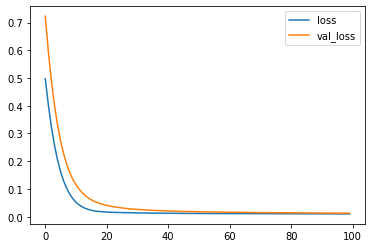

In [163]:
# And then I can actually plot this out.

loss_df.plot()

# Typically in Neural Network training, you start of with a very high loss during your first couple of epoch runs.
# And then, as your weights and biases are starting to adjusting, you hopefully see kind of a steady but steep decline
# in your loss, or your error. And eventually, it will level off where you are not really doing any sort of improvements
# as you train more and more.

# I can directly compare the plot behavior of my "blue" training loss, versus my "orange" validation loss.
# We want a signal where it is decreasing, both the training loss and the validation loss.
# And then there should be no increase in in the validation set.
# Actually, what that means technically, we could have continued training.
# If the validation loss is also going down, that is an indicator that we could continue training without overfitting to our training data.

# If you saw this orange line begin to spike after some of these epochs, so it is starting to go up and up and up,
# that means that you are overtraining to the training data, because now you have a much larger loss on your validation data.

In [164]:
model.evaluate(x_test, y_test, verbose=0)
model.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN = model.predict(x_test)
test_predictions_ANN = pd.Series(test_predictions_ANN.reshape(53,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

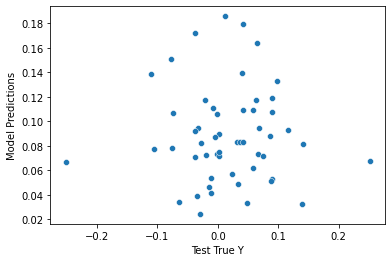

In [165]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [166]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score


In [167]:
# Mean absolute error
mean_absolute_error(y_test, test_predictions_ANN)

0.08880124

In [168]:
# Mean squared error
mean_squared_error(y_test, test_predictions_ANN)

0.012479499

In [169]:
# Root mean squared error
mean_squared_error(y_test, test_predictions_ANN)**0.5

0.11171167791430538

In [170]:
explained_variance_score(y_test, test_predictions_ANN)

-0.2653229236602783

In [171]:
# Mean squared error
MSE_ANN = mean_squared_error(y_test, test_predictions_ANN)
# Mean absolute error
MAE_ANN = mean_absolute_error(y_test, test_predictions_ANN)
# Root mean squared error
RMSE_ANN = mean_squared_error(y_test, test_predictions_ANN)**0.5

In [172]:
print(MSE_ANN)
print(MAE_ANN)
print(RMSE_ANN)

0.012479499
0.08880124
0.11171167791430538


In [173]:
SS_Residual = sum((y_test-test_predictions_ANN)**2)   
SS_Total = sum((y_test)**2)     

# r_squared
r_squared_ANN = 1 - (SS_Residual/SS_Total)
print(r_squared_ANN)

-1.0254058578825087


In [174]:
print(r_squared_FF3)

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

-0.02452785331309837
MSE = 0.0063126075554733865
MAE = 0.05908944472843093
Root MSE = 0.07945191977210737


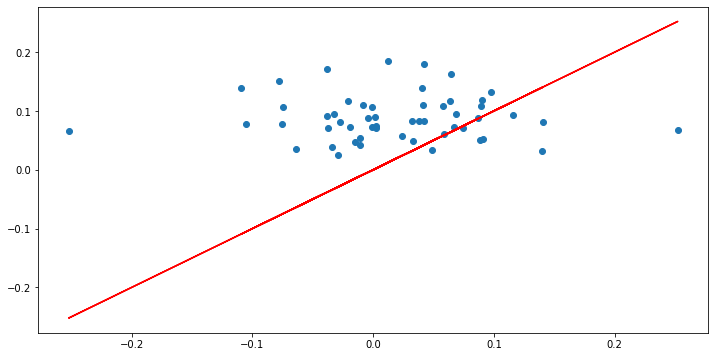

In [175]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions_ANN)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to answer, or what problem we are trying to solve.

# Second option: small hidden layer
 



In [176]:
model_2 = Sequential()

model_2.add(Dense(6,activation='relu'))
model_2.add(Dense(1,activation='relu')) 
#model.add(Dense(56,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [177]:
model_2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop])

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.0199 - val_loss: 0.0381
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.0252
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.0183
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0090 - val_loss: 0.0140
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0119
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.0106
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0099
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0094
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.0091
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0089
Epoch 11/100
8/8 [=========

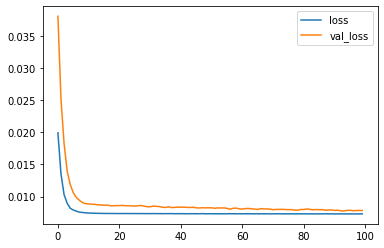

In [178]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [179]:
model_2.evaluate(x_test, y_test, verbose=0)
model_2.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN2 = model_2.predict(x_test)
test_predictions_ANN2 = pd.Series(test_predictions_ANN2.reshape(53,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN2],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [180]:
SS_Residual_2 = sum((y_test-test_predictions_ANN2)**2)   
SS_Total_2 = sum((y_test)**2)    
r_squared_ANN_2 = 1- (SS_Residual_2/SS_Total_2)
print(r_squared_ANN_2)


-0.2702653475324315


In [181]:
MAE_ANN2 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5


print(MSE_ANN2)
print(MAE_ANN2)
print(RMSE_ANN2)

0.007826715
0.06824698
0.08846872202341546


In [182]:
print(r_squared_FF3)

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

-0.02452785331309837
MSE = 0.0063126075554733865
MAE = 0.05908944472843093
Root MSE = 0.07945191977210737


#**Option 3:** **Dropout**

In [183]:
#@title
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [184]:
#@title
model_3 = Sequential()

model_3.add(Dense(6,activation='relu')) 
model_3.add(Dropout(0.25))

model_3.add(Dense(3,activation='relu')) 


model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [185]:
#@title
model_3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop])

Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 0.4440 - val_loss: 0.8049
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3906 - val_loss: 0.6832
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2931 - val_loss: 0.5773
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2235 - val_loss: 0.4865
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2108 - val_loss: 0.4091
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1697 - val_loss: 0.3424
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1450 - val_loss: 0.2837
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1175 - val_loss: 0.2336
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0911 - val_loss: 0.1939
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0779 - val_loss: 0.1596
Epoch 11/100
8/8 [==========

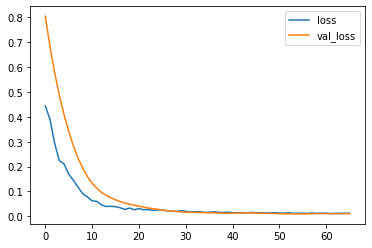

In [186]:
#@title
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

In [187]:
#@title
model_3.evaluate(x_test, y_test, verbose=0)
model_3.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN3 = model_3.predict(x_test)
test_predictions_ANN3 = pd.Series(test_predictions_ANN3.reshape(53,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN3],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [188]:
SS_Residual_3 = sum((y_test-test_predictions_ANN3)**2)   
SS_Total_3 = sum((y_test)**2)    
r_squared_ANN_3 = 1- (SS_Residual/SS_Total)
print(r_squared_ANN_3)

-1.0254058578825087


In [189]:
MAE_ANN3 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5


print(r_squared_ANN_3)
print(MSE_ANN3)
print(MAE_ANN3)
print(RMSE_ANN3)

-1.0254058578825087
0.010866488
0.0814121
0.10424244975088702


In [190]:
print(r_squared_FF3)

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

-0.02452785331309837
MSE = 0.0063126075554733865
MAE = 0.05908944472843093
Root MSE = 0.07945191977210737


# Diebold Mariano Function. Reference in the comments

In [191]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

# Diebold Mariano code and results

In [192]:
# Replaced with our values
# Comparison between FF3, ANN1
actual_lst = y_test
pred1_lst = test_predictions_FF3
pred2_lst = test_predictions_ANN
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-2.619890416924623, p_value=0.01150196222156936)


In [193]:
# Replaced with our values
# Comparison between FF3, ANN2
actual_lst = y_test
pred1_lst = test_predictions_FF3
pred2_lst = test_predictions_ANN2
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.8720935208866565, p_value=0.06682231680119667)


In [194]:
# Replaced with our values
# Comparison between FF3, ANN3
actual_lst = y_test
pred1_lst = test_predictions_FF3
pred2_lst = test_predictions_ANN3
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-3.732304870824522, p_value=0.00047115082059129374)


In [195]:
print(r_squared_ANN)
print(r_squared_ANN_2)
print(r_squared_ANN_3)
print(r_squared_FF3)

-1.0254058578825087
-0.2702653475324315
-1.0254058578825087
-0.02452785331309837
